In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
# If code is in the drive, the following line works, otherwise add folder names
os.chdir('/content/drive/My Drive/Code/EXTRA DATASET')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import numpy as np
import re

import pickle

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

In [3]:
with open('processedDS2sparks.pkl', 'rb') as fp:
    movies = pickle.load(fp)

In [4]:
keys = list(movies.keys())
df = movies[keys[0]]
df

,id,conversation_id,text,speaker,movie_id,Next Speaker,Y,Sentence Length
0,L1045,L1044,They do not!,u0,m0,u0,0,3
1,L1044,L1044,They do to!,u2,m0,u0,1,3
2,L985,L984,I hope so.,u0,m0,u2,1,3
3,L984,L984,She okay?,u2,m0,u0,1,2
4,L925,L924,Let's go.,u0,m0,u2,1,2
...,...,...,...,...,...,...,...,...
663,L191,L191,Jesus! Can a man even grab a sandwich before ...,u11,m0,u10,1,14
664,L171,L170,Sarah Lawrence is on the other side of the cou...,u11,m0,u11,0,10
665,L170,L170,What's a synonym for throbbing?,u10,m0,u11,1,5
666,L162,L161,Make anyone cry today?,u11,m0,u10,1,4


In [6]:
with open('processedDS2concattedframe.pkl', 'rb') as fp:
    concatted_movies = pickle.load(fp)
concatted_movies

,id,conversation_id,text,speaker,movie_id,Next Speaker,Y,Sentence Length
0,L1045,L1044,They do not!,u0,m0,u0,0,3
1,L1044,L1044,They do to!,u2,m0,u0,1,3
2,L985,L984,I hope so.,u0,m0,u2,1,3
3,L984,L984,She okay?,u2,m0,u0,1,2
4,L925,L924,Let's go.,u0,m0,u2,1,2
...,...,...,...,...,...,...,...,...
300688,L666371,L666369,Lord Chelmsford seems to want me to stay back ...,u9030,m616,u9034,1,12
300689,L666370,L666369,I'm to take the Sikali with the main column to...,u9034,m616,u9030,1,12
300690,L666369,L666369,"Your orders, Mr Vereker?",u9030,m616,u9034,1,4
300691,L666257,L666256,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,m616,u9030,0,11


In [7]:
%%time
mins = {}
means = {}
maxs = {}

minssens = {}
meanssens = {}
maxssens = {}

scriptlengths = {}
numspeakers_perscript = {}

negsperscript = {}
posperscript = {}

for key in keys:
  df = movies[key]
  dfsen = df['Sentence Length']
  dfconv = df['conversation_id'].value_counts()

  mins[key] = dfconv.min()
  means[key] = dfconv.mean()
  maxs[key] = dfconv.max()

  minssens[key] = dfsen.min()
  meanssens[key] = dfsen.mean()
  maxssens[key] = dfsen.max()

  scriptlengths[key] = len(df)
  numspeakers_perscript[key] = len(df.speaker.unique())

  negsperscript[key] = len(df[df.Y == 0])
  posperscript[key] = len(df[df.Y == 1])

CPU times: user 1.55 s, sys: 6.68 ms, total: 1.55 s
Wall time: 2.06 s


In [8]:
# Create a dataframe to show maximum lenghts of sentences
maxdf = pd.DataFrame(pd.Series(maxs))
maxdf = maxdf.reset_index().rename(columns={'index':'File_name',0:'Maximum Length'})

# Create frame of scriptlengths
scriptlengthsdf = pd.DataFrame(pd.Series(scriptlengths))
scriptlengthsdf = scriptlengthsdf.reset_index().rename(columns={'index':'File_name',0:'Script Length'})
#display(scriptlengthsdf)

# Create frame of number of speakers per script
numspeakers_perscriptdf = pd.DataFrame(pd.Series(numspeakers_perscript))
numspeakers_perscriptdf = numspeakers_perscriptdf.reset_index().rename(columns={'index':'File_name',0:'Number of Speakers per Script'})
#display(numspeakers_perscriptdf)

# Create frame negatives per script (same speaker)
negsperscriptdf = pd.DataFrame(pd.Series(negsperscript))
negsperscriptdf = negsperscriptdf.reset_index().rename(columns={'index':'File_name',0:'Negatives_ps'})
#display(negsperscriptdf)

# Create frame positives per script (different speaker)
posperscriptdf = pd.DataFrame(pd.Series(posperscript))
posperscriptdf = posperscriptdf.reset_index().rename(columns={'index':'File_name',0:'Positives_ps'})
display(posperscriptdf)

,File_name,Positives_ps
0,10Things,583
1,1492-ConquestOfParadise,229
2,15minutes,591
3,2001,212
4,48hours,505
...,...,...
604,wtchmn,318
605,xXx,374
606,xmenthing,150
607,young,506


In [9]:
# REF https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr
# Return dataframe with outliers and outlier values
def outliers(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1
  threshold = 1.5

  left_outliers = Q1 - threshold * IQR
  right_outliers = Q3 + threshold * IQR

  return df[(df[col] < left_outliers) | (df[col] > right_outliers)], left_outliers, right_outliers

In [10]:
# Create plots
def plots(df,col,lx=None,rx=None):
  plt.figure(figsize=(6, 5))


  ax = sns.histplot(df[col], color='g', bins=100, kde=True)
  ax.set_title("Frequency Distribution of {}s DS2".format(col))

  if lx != None:
    ax.axvline(x = lx)
  if rx != None:
    ax.axvline(x =rx)

  return ax

## Script Lengths

In [11]:
serie = scriptlengthsdf['Script Length']

print("Shortest script length: ",serie.min(),". Mean script length: ",serie.mean(),". Longest script length: ",serie.max(),". Most occurances script length: ",serie.mode()[0],".")
print("Median: ",serie.median())

display(scriptlengthsdf.sort_values('Script Length',ascending=False)[:15])

Shortest script length:  11 . Mean script length:  493.7487684729064 . Longest script length:  1286 . Most occurances script length:  439 .
Median:  473.0


,File_name,Script Length
296,Clerks,1286
104,Jackie+Brown,1214
292,chillfactor,1204
236,All%20About%20Eve,1187
507,shampoo,1160
81,Happy_Birthday_Wanda_JUne,1160
89,His%20Girl%20Friday,1148
424,magnolia,1114
430,meetjoeblack,1094
377,Hannah%20And%20Her%20Sisters,1080


Frequency distribution plot


<Axes: title={'center': 'Frequency Distribution of Script Lengths DS2'}, xlabel='Script Length', ylabel='Count'>

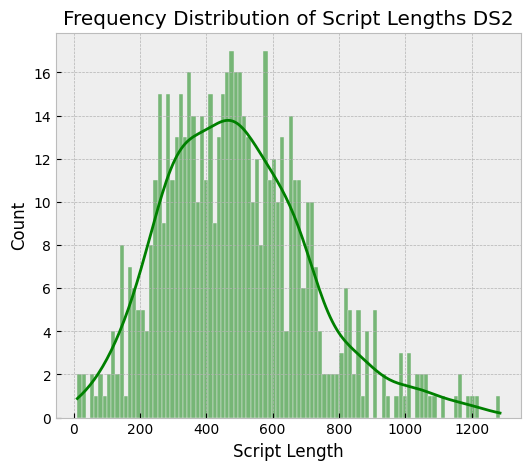

In [12]:
  print("Frequency distribution plot")
  display(plots(scriptlengthsdf,'Script Length'))

In [13]:
output = outliers(scriptlengthsdf,'Script Length')
outliers_df = output[0]
lxs = output[1]
rxs = output[2]

print("Left outliers are outside: ",lxs,". Which are not present because the smallest number is 1. The right outliers are outside the boundary: ",rxs,".")
print('Percentage of the whole ',(len(scriptlengthsdf[scriptlengthsdf['Script Length'] > rxs])*100)/len(scriptlengthsdf),'%')

Left outliers are outside:  -112.5 . Which are not present because the smallest number is 1. The right outliers are outside the boundary:  1067.5 .
Percentage of the whole  1.6420361247947455 %


Frequency distribution plot with outlier boundaries


<Axes: title={'center': 'Frequency Distribution of Script Lengths DS2'}, xlabel='Script Length', ylabel='Count'>

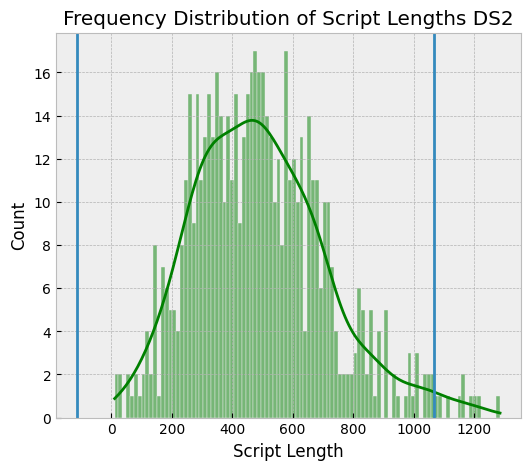

In [14]:
print("Frequency distribution plot with outlier boundaries")
ax = plots(scriptlengthsdf,'Script Length',lx=lxs,rx=rxs)
# Save plot to file
#plt.savefig("DS2SCRIPTSFrequencyscriptlengthswoutliers.png")
display(ax)

In [15]:
indices = outliers_df.index
scriptlengthsdf = scriptlengthsdf.drop(indices)

Frequency distribution plot without outliers


<Axes: title={'center': 'Frequency Distribution of Script Lengths DS2'}, xlabel='Script Length', ylabel='Count'>

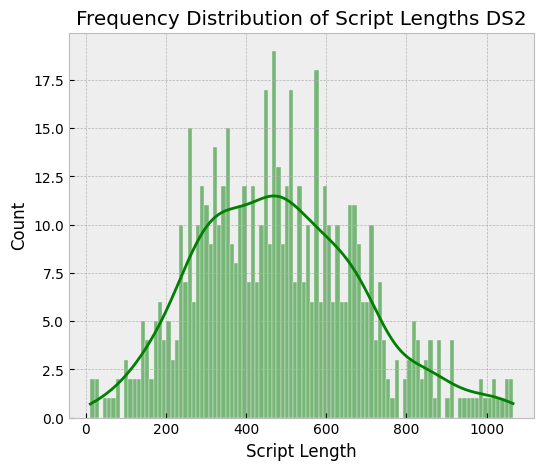

In [16]:
print("Frequency distribution plot without outliers")
display(plots(scriptlengthsdf,'Script Length'))

## Sentence Lengths

In [17]:
serie = concatted_movies['Sentence Length']

print("Shortest sentence length: ",serie.min(),". Mean sentence length: ",serie.mean(),". Longest sentence length: ",serie.max(),". Most occurances sentence length: ",serie.mode()[0],".")
print("Median: ",serie.median())

display(concatted_movies.sort_values('Sentence Length',ascending=False)[:15])

Shortest sentence length:  1 . Mean sentence length:  10.828492848187354 . Longest sentence length:  559 . Most occurances sentence length:  4 .
Median:  7.0


,id,conversation_id,text,speaker,movie_id,Next Speaker,Y,Sentence Length
180042,L217873,L217871,Then let's begin with the story itself. It's a...,u5313,m352,u5313,0,559
27711,L195222,L195221,"Shit O dear, that's enough to make me asthmati...",u878,m56,u877,1,485
189554,L249918,L249911,So if I asked you about art you could give me ...,u5615,m373,u5621,1,347
182943,L226026,L226026,"When you dropped me off at the house, it was v...",u5406,m359,u5409,1,339
180071,L217784,L217776,WILL YOU PLEASE... please listen to me ... Yo...,u5310,m352,u5313,1,322
262420,L548707,L548705,To the contrary. I want you to tell the truth...,u7877,m532,u7877,0,322
213959,L362752,L362744,Yeah...So I go to her school for that for grad...,u6428,m428,u6428,0,301
64145,L357435,L357427,We have reason. It is the entire meaning and p...,u1896,m124,u1899,1,300
202154,L311961,L311961,"Just a minute just a minute. Now, hold on, Mr...",u6045,m402,u6059,1,300
254885,L513005,L512999,"Anyway, it's hard to live gay, that's the righ...",u7673,m518,u7666,1,300


Frequency distribution plot


<Axes: title={'center': 'Frequency Distribution of Sentence Lengths DS2'}, xlabel='Sentence Length', ylabel='Count'>

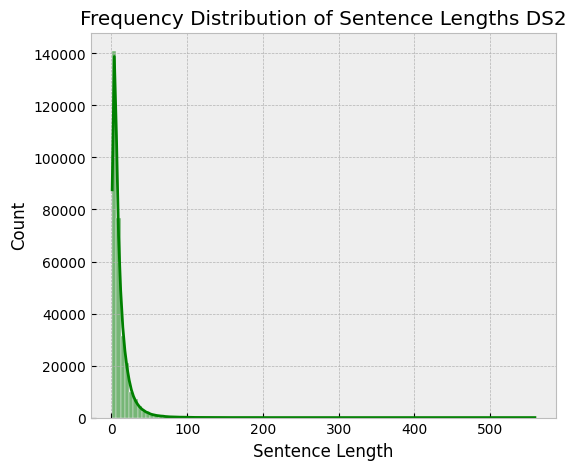

In [18]:
print("Frequency distribution plot")
display(plots(concatted_movies,'Sentence Length'))

Frequency distribution plot of maximum sentence lengths per scripts


<Axes: title={'center': 'Frequency Distribution of Maximum Lengths DS2'}, xlabel='Maximum Length', ylabel='Count'>

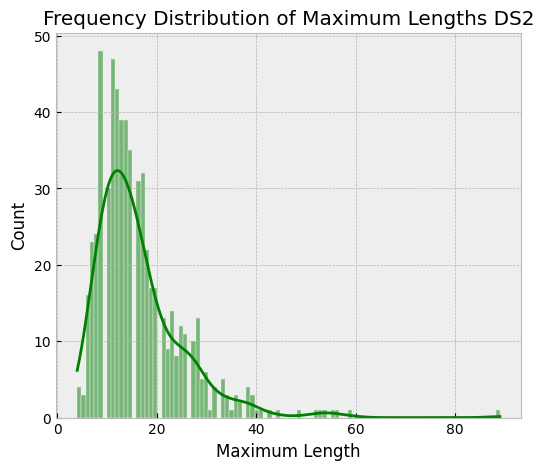

In [19]:
print("Frequency distribution plot of maximum sentence lengths per scripts")
display(plots(maxdf,'Maximum Length'))

In [20]:
concatted_movies['Index'] = concatted_movies.index
concatted_movies

,id,conversation_id,text,speaker,movie_id,Next Speaker,Y,Sentence Length,Index
0,L1045,L1044,They do not!,u0,m0,u0,0,3,0
1,L1044,L1044,They do to!,u2,m0,u0,1,3,1
2,L985,L984,I hope so.,u0,m0,u2,1,3,2
3,L984,L984,She okay?,u2,m0,u0,1,2,3
4,L925,L924,Let's go.,u0,m0,u2,1,2,4
...,...,...,...,...,...,...,...,...,...
300688,L666371,L666369,Lord Chelmsford seems to want me to stay back ...,u9030,m616,u9034,1,12,300688
300689,L666370,L666369,I'm to take the Sikali with the main column to...,u9034,m616,u9030,1,12,300689
300690,L666369,L666369,"Your orders, Mr Vereker?",u9030,m616,u9034,1,4,300690
300691,L666257,L666256,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,m616,u9030,0,11,300691


In [21]:
output = outliers(concatted_movies,'Sentence Length')
outliers_df = output[0]
lxsl = output[1]
rxsl = output[2]

print("Left outliers are outside: ",lxsl,". Which are not present because the smallest number is 1. The right outliers are outside the boundary: ",rxsl,".")
print("These are there; see plot.")
print('Percentage of the whole ',(len(concatted_movies[concatted_movies['Sentence Length'] > rxsl])*100)/len(concatted_movies),'%')

Left outliers are outside:  -9.5 . Which are not present because the smallest number is 1. The right outliers are outside the boundary:  26.5 .
These are there; see plot.
Percentage of the whole  7.882125623143871 %


Frequency distribution plot with outlier boundaries


<Axes: title={'center': 'Frequency Distribution of Sentence Lengths DS2'}, xlabel='Sentence Length', ylabel='Count'>

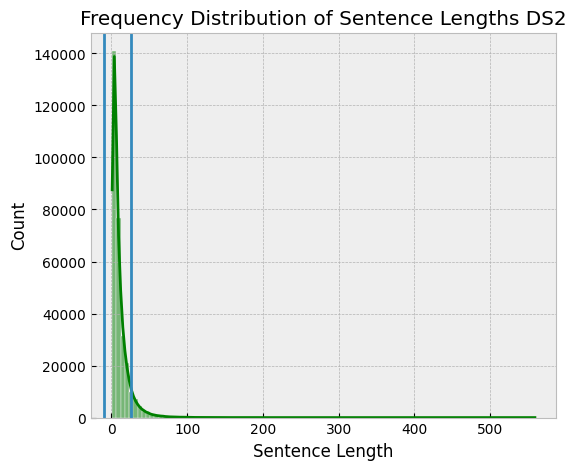

In [22]:
print("Frequency distribution plot with outlier boundaries")
ax2 = plots(concatted_movies,'Sentence Length',lx=lxsl,rx=rxsl)
# Save plot to file
#plt.savefig("DS2SENTENCESFrequencysentencelenghts.png")
display(ax2)

In [23]:
indices = outliers_df.index
inds = pd.DataFrame({'Index':indices})
#inds

In [24]:
div = int(len(concatted_movies)/5)
div2 = div + div
div3 = div2 + div
div4 = div3 + div

div,div2,div3,div4

(60138, 120276, 180414, 240552)

In [25]:
condiv1 = concatted_movies[:div]
condiv2 = concatted_movies[div:div2]
condiv3 = concatted_movies[div2:div3]
condiv4 = concatted_movies[div3:div4]
condiv5 = concatted_movies[div4:]

In [26]:
condiv1 = condiv1.drop(inds.merge(condiv1, how='inner')['Index'].tolist())
#print(len(condiv1))
condiv2 = condiv2.drop(inds.merge(condiv2, how='inner')['Index'].tolist())
#print(len(condiv2))
condiv3 = condiv3.drop(inds.merge(condiv3, how='inner')['Index'].tolist())
#print(len(condiv3))
condiv4 = condiv4.drop(inds.merge(condiv4, how='inner')['Index'].tolist())
#print(len(condiv4))
condiv5 = condiv5.drop(inds.merge(condiv5, how='inner')['Index'].tolist())
#print(len(condiv5))

In [27]:
concatted_movies = pd.concat([condiv1,condiv2,condiv3,condiv4,condiv5])

Frequency distribution plot without outliers


<Axes: title={'center': 'Frequency Distribution of Sentence Lengths DS2'}, xlabel='Sentence Length', ylabel='Count'>

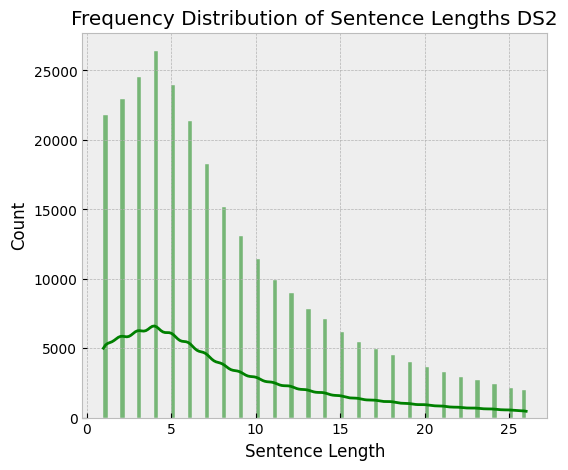

In [28]:
print("Frequency distribution plot without outliers")
display(plots(concatted_movies,'Sentence Length'))

## Conversational splits

In [29]:
serie = concatted_movies['conversation_id'].value_counts()

print("Shortest conversation length: ",serie.min(),". Mean conversation length: ",serie.mean(),". Longest conversation length: ",serie.max(),
      ". Most occurances conversation length: ",serie.mode()[0],".")
print("Median conversation length: ",serie.median())

display(serie.sort_values(ascending=False)[:15])
df = pd.DataFrame()
df['Conversation Length'] = serie

Shortest conversation length:  1 . Mean conversation length:  3.386127478545757 . Longest conversation length:  80 . Most occurances conversation length:  2 .
Median conversation length:  2.0


L135360    80
L553902    57
L134608    49
L652880    48
L52356     48
L393396    47
L267558    46
L513247    44
L167261    44
L13929     43
L134412    42
L251104    41
L14324     41
L393673    39
L167316    39
Name: conversation_id, dtype: int64

Frequency distribution plot


<Axes: title={'center': 'Frequency Distribution of Conversation Lengths DS2'}, xlabel='Conversation Length', ylabel='Count'>

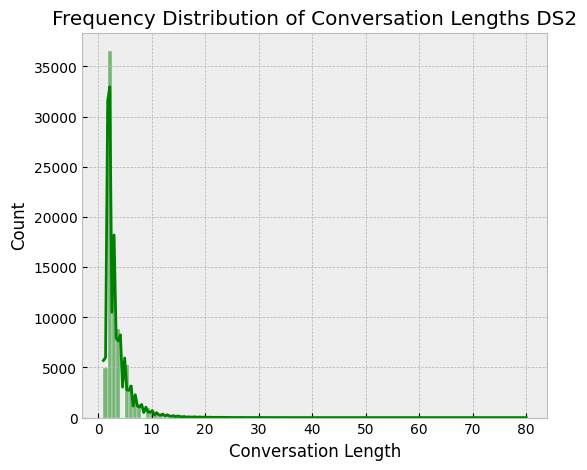

In [30]:
print("Frequency distribution plot")
display(plots(df,'Conversation Length'))

In [32]:
df['Index'] = df.index

In [33]:
output = outliers(df,'Conversation Length')
outliers_df = output[0]
lxsl = output[1]
rxsl = output[2]

print("Left outliers are outside: ",lxsl,". Which are not present because the smallest number is 1. The right outliers are outside the boundary: ",rxsl,".")
print("These are there; see plot.")
print('Percentage of the whole ',(len(df[df['Conversation Length'] > rxsl])*100)/len(df),'%')

Left outliers are outside:  -1.0 . Which are not present because the smallest number is 1. The right outliers are outside the boundary:  7.0 .
These are there; see plot.
Percentage of the whole  6.007188088310799 %


Frequency distribution plot with outlier boundaries


<Axes: title={'center': 'Frequency Distribution of Conversation Lengths DS2'}, xlabel='Conversation Length', ylabel='Count'>

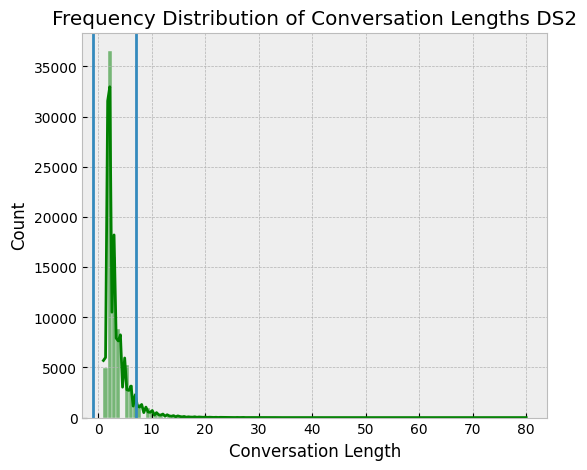

In [34]:
print("Frequency distribution plot with outlier boundaries")
ax2 = plots(df,'Conversation Length',lx=lxsl,rx=rxsl)
# Save plot to file
#plt.savefig("DS2ConversationFrequencysentencelenghts.png")
display(ax2)

In [35]:
indices = outliers_df.index
df = df.drop(indices)

Frequency distribution plot without outliers


<Axes: title={'center': 'Frequency Distribution of Conversation Lengths DS2'}, xlabel='Conversation Length', ylabel='Count'>

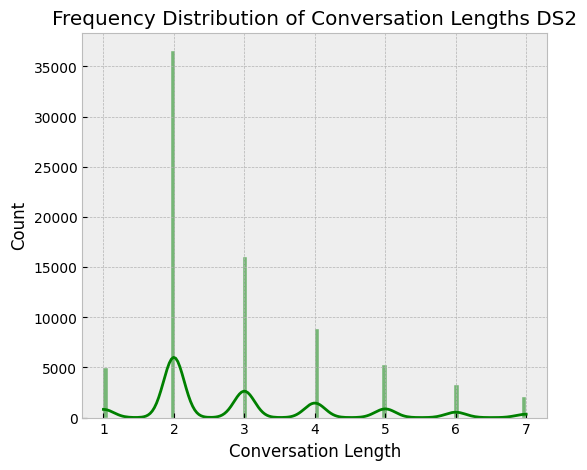

In [36]:
print("Frequency distribution plot without outliers")
display(plots(df,'Conversation Length'))

## Number of Speakers per Script

In [37]:
serie = numspeakers_perscriptdf['Number of Speakers per Script']

print("Least speakers per script: ",serie.min(),". Mean speakers per script: ",serie.mean(),". Most speakesr per script: ",serie.max(),". Most occurances speaker counts: ",serie.mode()[0],".")
print("Median",serie.median())
display(numspeakers_perscriptdf.sort_values('Number of Speakers per Script',ascending=False)[:15])

Least speakers per script:  2 . Mean speakers per script:  14.61576354679803 . Most speakesr per script:  38 . Most occurances speaker counts:  12 .
Median 14.0


,File_name,Number of Speakers per Script
419,Lone%20Star,38
424,magnolia,36
330,enemyofthestate,35
103,JFK,34
371,"Grapes%20Of%20Wrath,%20The",33
366,godfather2,32
139,Mr,31
398,itsawonderfullife,30
222,Twin+Peaks+-+Fire+Walk+With+Me,30
62,Frances,29


Frequency distribution plot


<Axes: title={'center': 'Frequency Distribution of Number of Speakers per Scripts DS2'}, xlabel='Number of Speakers per Script', ylabel='Count'>

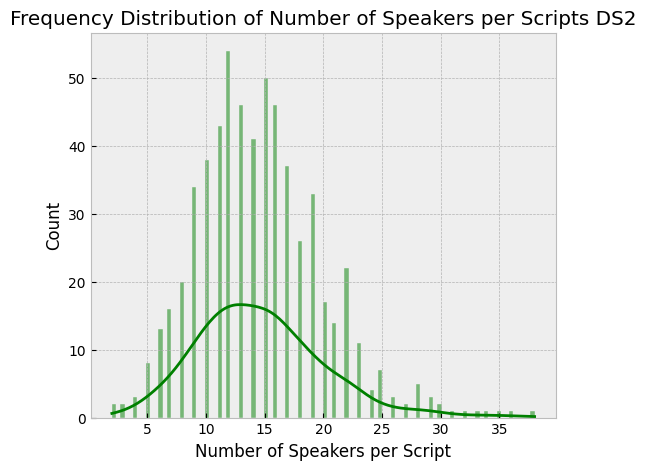

In [38]:
print("Frequency distribution plot")
display(plots(numspeakers_perscriptdf,'Number of Speakers per Script'))

In [39]:
output = outliers(numspeakers_perscriptdf,'Number of Speakers per Script')
outliers_df = output[0]
lxsp = output[1]
rxsp = output[2]

print("Left outliers are outside: ",lxsp,". Which are not present because the smallest number is 1. The right outliers are outside the boundary: ",rxsp,".")
print("These are there; see plot.")
print('Percentage of the whole ',(len(numspeakers_perscriptdf[numspeakers_perscriptdf['Number of Speakers per Script'] > rxsp])*100)/len(numspeakers_perscriptdf),'%')

Left outliers are outside:  0.5 . Which are not present because the smallest number is 1. The right outliers are outside the boundary:  28.5 .
These are there; see plot.
Percentage of the whole  1.9704433497536946 %


Frequency distribution plot with outlier boundaries


<Axes: title={'center': 'Frequency Distribution of Number of Speakers per Scripts DS2'}, xlabel='Number of Speakers per Script', ylabel='Count'>

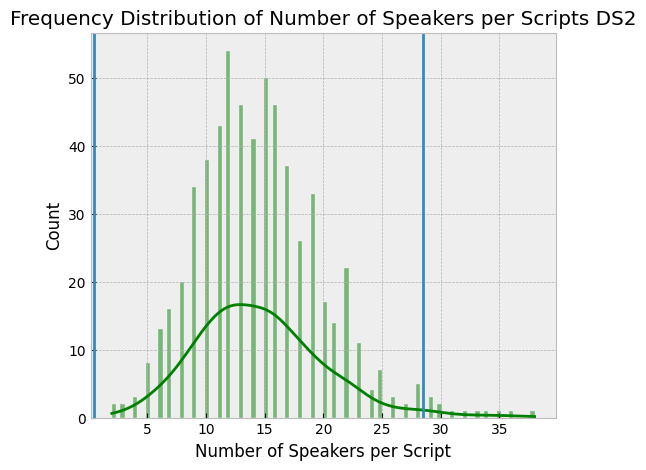

In [40]:
print("Frequency distribution plot with outlier boundaries")
display(plots(numspeakers_perscriptdf,'Number of Speakers per Script',lx=lxsp,rx=rxsp))
# Save plot to file
#plt.savefig("DS2SPEAKERSFrequencynumspeakers.png")

In [41]:
indices = outliers_df.index
numspeakers_perscriptdf = numspeakers_perscriptdf.drop(indices)

Frequency distribution plot without outliers


<Axes: title={'center': 'Frequency Distribution of Number of Speakers per Scripts DS2'}, xlabel='Number of Speakers per Script', ylabel='Count'>

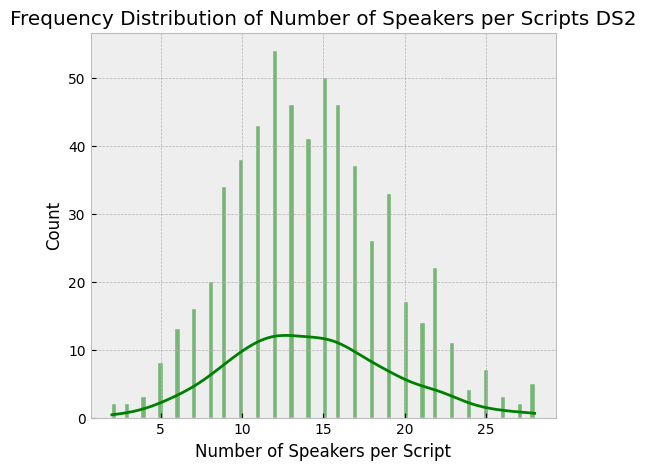

In [42]:
print("Frequency distribution plot without outliers")
ax3 = plots(numspeakers_perscriptdf,'Number of Speakers per Script')
display(ax3)

## Distribution of Negatives and Positives

In [43]:
print('Negatives: ',len(concatted_movies[concatted_movies.Y == 0]),'Positives: ',len(concatted_movies[concatted_movies.Y == 1]))
# Imbalanced

Negatives:  31717 Positives:  245275


<Axes: xlabel='Negatives_ps', ylabel='Count'>

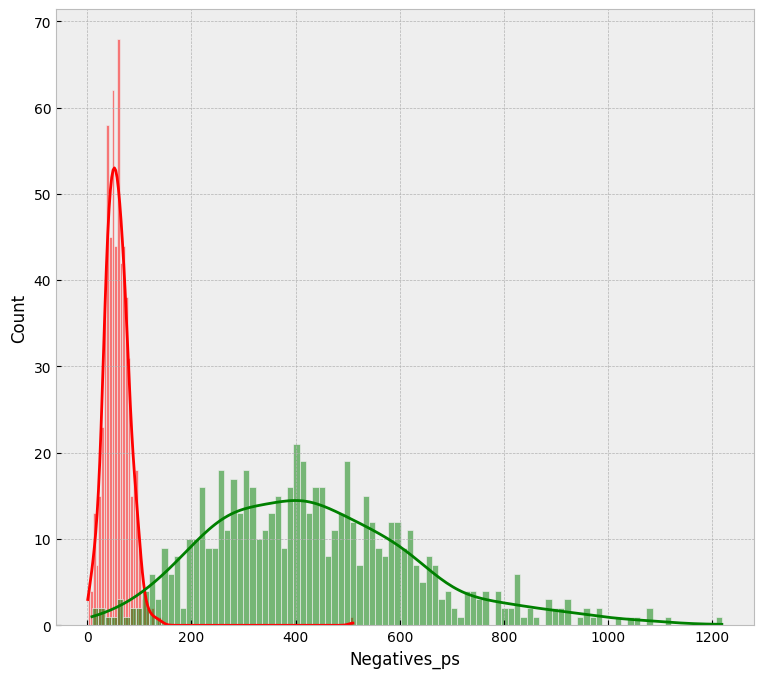

In [44]:
# Shows a distribution of yes or no on different speaker
plt.figure(figsize=(9, 8))
ax = sns.histplot(negsperscriptdf['Negatives_ps'], color='r', bins=100, kde=True)
ax = sns.histplot(posperscriptdf['Positives_ps'], color='g', bins=100, kde=True)
ax